## 0. Understanding the Problem / Data
Our assignment focuses on creating a monthly and daily sales forecast for service stations spread throughout La Coruña taking into account any variables that might better the accuracy of the model. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import plotly.express as px

In [3]:
#!pip install statsmodels

## 1. Understanding the Datasets / Merging the Data


## 1.1 Cleaning and Merging the 3 vehicles datasets ( + additional found for 2019)

In [4]:
df_vehiculos_2016 = pd.read_csv('Comercial_ParqueVehiculos2016.csv', delimiter=";")
df_vehiculos_2017 = pd.read_csv('Comercial_ParqueVehiculos2017.csv', delimiter=";")
df_vehiculos_2018 = pd.read_csv('Comercial_ParqueVehiculos2018.csv', delimiter=";")
df_vehiculos_2019 = pd.read_csv('Comercial_ParqueVehiculos2019.csv', delimiter=";")

In [5]:
df_vehiculos_2018

,PROVINCIAS,MUNICIPIOS,CAMIONES,FURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,Coruña (A),Abegondo,359,265,0,3668,329,38,90,108,4857
1,Coruña (A),Ames,814,827,2,15252,1186,49,124,171,18425
2,Coruña (A),Aranga,96,108,1,1257,75,12,29,33,1611
3,Coruña (A),Ares,120,88,0,2899,240,6,18,38,3409
4,Coruña (A),Arteixo,1743,1165,42,17320,1648,136,284,475,22813
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,53,53,1,886,114,1,12,21,1141
91,Coruña (A),Vilasantar,119,98,0,871,53,2,9,29,1181
92,Coruña (A),Vimianzo,623,410,29,4581,295,55,129,238,6360
93,Coruña (A),Zas,349,212,30,3240,249,24,54,91,4249


In [6]:
df_vehiculos_2019.dropna(inplace=True)
df_vehiculos_2019

,PROVINCIAS,MUNICIPIOS,CAMIONES,FURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,Coruña (A),Abegondo,385.0,281.0,0.0,3716.0,342.0,39.0,91.0,115.0,4969.0
1,Coruña (A),Ames,798.0,864.0,2.0,15809.0,1259.0,48.0,126.0,184.0,19090.0
2,Coruña (A),Aranga,97.0,110.0,1.0,1276.0,72.0,13.0,32.0,34.0,1635.0
3,Coruña (A),Ares,113.0,100.0,0.0,2998.0,259.0,7.0,18.0,41.0,3536.0
4,Coruña (A),Arteixo,1687.0,1223.0,37.0,17796.0,1747.0,142.0,315.0,493.0,23440.0
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,56.0,57.0,1.0,906.0,125.0,3.0,14.0,23.0,1185.0
91,Coruña (A),Vilasantar,116.0,102.0,0.0,899.0,49.0,4.0,8.0,26.0,1204.0
92,Coruña (A),Vimianzo,622.0,421.0,29.0,4667.0,294.0,60.0,140.0,238.0,6471.0
93,Coruña (A),Zas,345.0,231.0,30.0,3237.0,268.0,24.0,54.0,91.0,4280.0


In [7]:
# convert dates into datetime

df_vehiculos_2016["date"] = pd.to_datetime("2016")
df_vehiculos_2016["year"] = df_vehiculos_2016['date'].dt.year
df_vehiculos_2016.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2017["date"] = pd.to_datetime("2017")
df_vehiculos_2017["year"] = df_vehiculos_2017['date'].dt.year
df_vehiculos_2017.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2018["date"] = pd.to_datetime("2018")
df_vehiculos_2018["year"] = df_vehiculos_2018['date'].dt.year
df_vehiculos_2018.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2019["date"] = pd.to_datetime("2019")
df_vehiculos_2019["year"] = df_vehiculos_2019['date'].dt.year
df_vehiculos_2019.drop(columns = "date", inplace=True, axis=1)

In [8]:
# we merge 2017 and 2018 and 2019

df_vehiculos_1 = pd.concat([df_vehiculos_2017, df_vehiculos_2018, df_vehiculos_2019])

In [9]:
# we add camiones and furgonetas since they were as one column in one of the df

df_vehiculos_1['CAMIONES y\nFURGONETAS'] = df_vehiculos_1['CAMIONES'] + df_vehiculos_1['FURGONETAS'] 
df_vehiculos_1 = df_vehiculos_1.drop(["CAMIONES","FURGONETAS"],1)

In [10]:
# merge 2016, 2017, 2018 and 2019

df_vehicles = pd.concat([df_vehiculos_2016, df_vehiculos_1])

In [11]:
df_vehicles

,PROVINCIAS,MUNICIPIOS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL,year
0,Coruña (A),Abegondo,606.0,0.0,3515.0,313.0,34.0,76.0,91.0,4635.0,2016
1,Coruña (A),Ames,1524.0,1.0,14263.0,1053.0,42.0,109.0,155.0,17147.0,2016
2,Coruña (A),Aranga,194.0,1.0,1221.0,70.0,14.0,23.0,34.0,1557.0,2016
3,Coruña (A),Ares,201.0,0.0,2728.0,226.0,5.0,19.0,28.0,3207.0,2016
4,Coruña (A),Arteixo,2827.0,49.0,16303.0,1531.0,130.0,253.0,450.0,21543.0,2016
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,113.0,1.0,906.0,125.0,3.0,14.0,23.0,1185.0,2019
91,Coruña (A),Vilasantar,218.0,0.0,899.0,49.0,4.0,8.0,26.0,1204.0,2019
92,Coruña (A),Vimianzo,1043.0,29.0,4667.0,294.0,60.0,140.0,238.0,6471.0,2019
93,Coruña (A),Zas,576.0,30.0,3237.0,268.0,24.0,54.0,91.0,4280.0,2019


## 1.2 Cleaning the Censo dataset 

In [12]:
df_census = pd.read_csv('Comercial_Censo.csv', delimiter=";")
df_census_2019 = pd.read_csv('Comercial_Censo2019.csv', delimiter=";", usecols = ['Periodo', 'Total'], encoding = 'iso8859_2')
df_census.shape

(96, 12)

In [13]:
df_census['2019'] = df_census_2019['Total']

In [14]:
df_census.drop([0], axis=0, inplace=True)
df_census.head(2)

,Municipio,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2019
1,15001 Abegondo,5.454,5.467,5.533,5.586,5.585,5.664,5.709,5.709,5.765,5.798,5.822,5.406
2,15002 Ames,31.278,30.835,30.544,30.267,29.975,29.689,29.331,28.852,27.900,26.983,25.818,31.793


In [15]:
# make the municipio and year as rows to be able to merge with the main df

df_census = df_census.melt(id_vars=["Municipio"], value_vars=["2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008"], var_name="year", value_name="Population").sort_values('Municipio')
df_census.head(2)

,Municipio,year,Population
0,15001 Abegondo,2019,5.406
475,15001 Abegondo,2014,5.585


In [16]:
df_census[df_census["Municipio"].str.contains("Coruña, A")]

,Municipio,year,Population
220,"15030 Coruña, A",2017,244.099
30,"15030 Coruña, A",2019,245.711
980,"15030 Coruña, A",2009,246.056
315,"15030 Coruña, A",2016,243.978
125,"15030 Coruña, A",2018,244.850
410,"15030 Coruña, A",2015,243.870
1075,"15030 Coruña, A",2008,245.164
790,"15030 Coruña, A",2011,246.028
695,"15030 Coruña, A",2012,246.146
505,"15030 Coruña, A",2014,244.810


In [17]:
# format the municipio column

df_census["Municipio"] =  np.where(
    df_census["Municipio"] == "15 Coruña, A",
        df_census["Municipio"].str[3:],
        df_census["Municipio"].str[6:]

)
df_census.head(2)

,Municipio,year,Population
0,Abegondo,2019,5.406
475,Abegondo,2014,5.585


In [18]:
df_census[df_census["Municipio"] == "Coruña, A"]

,Municipio,year,Population
220,"Coruña, A",2017,244.099
30,"Coruña, A",2019,245.711
980,"Coruña, A",2009,246.056
315,"Coruña, A",2016,243.978
125,"Coruña, A",2018,244.850
410,"Coruña, A",2015,243.870
1075,"Coruña, A",2008,245.164
790,"Coruña, A",2011,246.028
695,"Coruña, A",2012,246.146
505,"Coruña, A",2014,244.810


In [19]:
df_census['year']=df_census['year'].astype(int)

## 1.3 Cleaning the meteo dataset 

In [20]:
df_meteo = pd.read_csv('Comercial_Meteorologia.csv', delimiter=",")

pd.set_option("display.max_columns", None)
df_meteo.head(2)

,Unnamed: 0,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,0,58,18,2016-01-01,00,11,10:50,13:10,23:59,1387,A CORUA,"7,0","1012,5","998,3",A CORUA,"19,4","1,8","15,3","12,4","9,4","5,8"
1,1,58,22,2016-01-02,11,24,01:20,14:30,06:20,1387,A CORUA,"2,2","1014,3","1006,2",A CORUA,"13,6","5,7","14,0","11,2","8,4","4,2"


In [21]:
df_meteo['fecha'].min(), df_meteo['fecha'].max()

('2016-01-01', '2019-01-31')

In [22]:
df_meteo.columns, df_meteo.shape

(Index(['Unnamed: 0', 'altitud', 'dir', 'fecha', 'horaPresMax', 'horaPresMin',
        'horaracha', 'horatmax', 'horatmin', 'indicativo', 'nombre', 'prec',
        'presMax', 'presMin', 'provincia', 'racha', 'sol', 'tmax', 'tmed',
        'tmin', 'velmedia'],
       dtype='object'),
 (1127, 21))

In [23]:
#convert to date
df_meteo['fecha'] = pd.to_datetime(df_meteo['fecha']) 

#New columns year, month, day
df_meteo['year'] = pd.DatetimeIndex(df_meteo['fecha']).year
df_meteo['month'] = pd.DatetimeIndex(df_meteo['fecha']).month 
df_meteo['day'] = pd.DatetimeIndex(df_meteo['fecha']).day 

df_meteo.columns

Index(['Unnamed: 0', 'altitud', 'dir', 'fecha', 'horaPresMax', 'horaPresMin',
       'horaracha', 'horatmax', 'horatmin', 'indicativo', 'nombre', 'prec',
       'presMax', 'presMin', 'provincia', 'racha', 'sol', 'tmax', 'tmed',
       'tmin', 'velmedia', 'year', 'month', 'day'],
      dtype='object')

In [24]:
#dropping Unnamed column

df_meteo.drop(labels = "Unnamed: 0", inplace = True, axis = 1)

# drop useless variables as they are the same in every row

df_meteo.drop(["provincia", "nombre", "dir", "indicativo"], 1, inplace=True)

# drop hourly variables because we don’t have hourly demand date

df_meteo.drop(["horaPresMax", "horaPresMin"], 1, inplace=True)

In [25]:
df_meteo['altitud']

0       58
1       58
2       58
3       58
4       58
        ..
1122    58
1123    58
1124    58
1125    58
1126    58
Name: altitud, Length: 1127, dtype: int64

## 1.4 Cleaning the Test dataset

In [26]:
df_test = pd.read_csv('Comercial_Test.csv', delimiter=";")

# creating new columns

df_test['Year'] = pd.DatetimeIndex(df_test['Dia']).year
df_test['Month'] = pd.DatetimeIndex(df_test['Dia']).month 
df_test['Day'] = pd.DatetimeIndex(df_test['Dia']).day 
df_test['Weekday'] = pd.DatetimeIndex(df_test['Dia']).weekday 

# renaming fecha

df_test = df_test.rename(columns={'Dia': 'fecha'})
df_test['fecha'] = pd.to_datetime(df_test['fecha']) 

# dropping unnamed, dummifying fiesta

df_test.drop('Unnamed: 0', inplace = True, axis = 1)
df_test['Fiesta'] = np.where(((df_test['Day'] == 1) | (df_test['Day'] == 6)), 1, 0)
df_test["Christmas"] = np.where(((df_test['Day'] == 1)& (df_test["Month"] == 1)) |((df_test['Day'] == 6)& (df_test["Month"] == 1)),1,0)

df_test.head(2)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Christmas
0,2019-01-01,95,"43,31748953","-8,47923782","1,199","0,0939126888063492",ES4,2019,1,1,1,1,1
1,2019-01-01,GOA,"43,31748953","-8,47923782","1,159","0,233796029661409",ES4,2019,1,1,1,1,1


## 1.5 Cleaning the Ventas dataset 

In [27]:
df_ventas = pd.read_csv('Comercial_Ventas.csv', delimiter=";")

# creating the date columns

df_ventas['Year'] = pd.DatetimeIndex(df_ventas['Dia']).year
df_ventas['Month'] = pd.DatetimeIndex(df_ventas['Dia']).month 
df_ventas['Day'] = pd.DatetimeIndex(df_ventas['Dia']).day 
df_ventas['Weekday'] = pd.DatetimeIndex(df_ventas['Dia']).weekday

# dummifying fiesta
df_ventas['Fiesta'] = np.where(df_ventas['Fiesta'].isnull(), 0, 1)
df_ventas["Christmas"] = np.where(((df_ventas['Day'] == 1)& (df_ventas["Month"] == 1)) |((df_ventas['Day'] == 5)& (df_ventas["Month"] == 1)),1,0)

# renaming fecha for merging

df_ventas = df_ventas.rename(columns={'Dia': 'fecha'})
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha']) 
df_ventas.head(2)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Day,Month,Year,Weekday,Fiesta,Christmas
0,2016-01-01,95,"43,31748953","-8,47923782","1,169","0,05074742",ES4,1,1,2016,4,1,1
1,2016-01-01,GOA,"43,31748953","-8,47923782","1,009","0,186169968",ES4,1,1,2016,4,1,1


In [28]:
df_ventas

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Day,Month,Year,Weekday,Fiesta,Christmas
0,2016-01-01,95,"43,31748953","-8,47923782","1,169","0,05074742",ES4,1,1,2016,4,1,1
1,2016-01-01,GOA,"43,31748953","-8,47923782","1,009","0,186169968",ES4,1,1,2016,4,1,1
2,2016-02-01,95,"43,31748953","-8,47923782","1,169","0,173695862",ES4,1,2,2016,0,0,0
3,2016-02-01,GOA,"43,31748953","-8,47923782","1,009","0,4597959",ES4,1,2,2016,0,0,0
4,2016-03-01,95,"43,31748953","-8,47923782","1,169","0,13236665",ES4,1,3,2016,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2018-12-29,GOA,"43,33886779","-8,39372721","1,159","0,405144765",ES7,29,12,2018,5,0,0
26300,2018-12-30,95,"43,33886779","-8,39372721","1,209","0,209279224",ES7,30,12,2018,6,0,0
26301,2018-12-30,GOA,"43,33886779","-8,39372721","1,159","0,403786954",ES7,30,12,2018,6,0,0
26302,2018-12-31,95,"43,33886779","-8,39372721","1,209","0,253878492",ES7,31,12,2018,0,0,0


# 2. Merging the datasets 

## 2.1 Merging ventas and test dataset

In [29]:
df_ventas_test = pd.concat(
    [df_test, df_ventas])

## 2.2 Merging ventas&test with Meteo dataset

In [30]:
df_ventas_test_meteo =  pd.merge(
    df_ventas_test, df_meteo, how="left", on=["fecha"]
 )
df_ventas_test_meteo.drop(['year', 'month', 'day'], inplace = True, axis = 1)

In [31]:
df_ventas_test_meteo.sort_values('Year')

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia
10050,2016-09-26,95,"43,33364736","-8,40247476","1,199","0,172169331",ES9,2016,9,26,0,0,0,58,19:00,15:00,06:30,"0,6","1018,5","1014,6","7,2","4,3","22,2","18,0","13,8","1,9"
23284,2016-06-11,95,"43,37307585","-8,42789755","1,209","0,239406568",ES10,2016,6,11,5,0,0,58,16:40,14:10,04:40,"0,0","1011,6","1009,3","10,6","9,6","22,9","18,2","13,5","3,6"
23283,2016-05-11,GOA,"43,37307585","-8,42789755","1,089","0,536633901",ES10,2016,5,11,2,0,0,58,08:50,11:40,05:30,"0,8","998,2","995,7","8,9","7,3","18,3","14,2","10,2","2,5"
23282,2016-05-11,95,"43,37307585","-8,42789755","1,209","0,245038899",ES10,2016,5,11,2,0,0,58,08:50,11:40,05:30,"0,8","998,2","995,7","8,9","7,3","18,3","14,2","10,2","2,5"
23281,2016-04-11,GOA,"43,37307585","-8,42789755","1,099","0,796491105",ES10,2016,4,11,0,0,0,58,14:00,11:50,02:00,"4,8","997,4","992,8","15,8","6,3","14,0","9,6","5,2","5,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2019-01-30,95,"43,47224306","-8,16188278","1,259","0,216625925681235",ES12,2019,1,30,2,0,0,58,22:10,20:50,08:10,"20,0","1009,1","991,9","18,3","0,0","13,2","10,7","8,2","5,0"
491,2019-01-29,GOA,"43,47224306","-8,16188278","1,245","0,573359799958759",ES12,2019,1,29,1,0,0,58,10:00,10:30,21:30,"4,6","1012,9","1004,6","19,4","0,5","12,3","10,4","8,4","6,9"
490,2019-01-29,95,"43,47224306","-8,16188278","1,269","0,222500835840856",ES12,2019,1,29,1,0,0,58,10:00,10:30,21:30,"4,6","1012,9","1004,6","19,4","0,5","12,3","10,4","8,4","6,9"
499,2019-01-02,GOA,"43,27471331","-8,52874355","1,149","0,45257390961121",ES8,2019,1,2,2,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2"


## 2.3 Merging ventas&test&meteo with Census dataset

Ventas contains latitud and longitud, whereas Census contains the municpio. We will find which municipio each gas station is in and merge it based on that. 

In [32]:
!pip install geopy

In [33]:
# we format latitud and longitud so geocoders can read it 

df_ventas_test_meteo['Latitud'] = df_ventas_test_meteo['Latitud'].str.replace(',','.')
df_ventas_test_meteo['Longitud'] = df_ventas_test_meteo['Longitud'].str.replace(',','.')

df_ventas_test_meteo.sort_values(by='Latitud', ascending = False, inplace=True)
df_ventas_test_meteo['Longitud'] = df_ventas_test_meteo['Longitud'].fillna(method='ffill')

df_ventas_test_meteo.sort_values(by='Longitud', ascending = False, inplace=True)
df_ventas_test_meteo['Latitud'] = df_ventas_test_meteo['Latitud'].fillna(method='ffill')

In [34]:
# we use geocoders to find the address of each gas station
# geom column contains both latitude and longitud 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='hiobk')
# combine lat/long into new column -> tuples of strings
df_ventas_test_meteo['geom'] = df_ventas_test_meteo.apply(lambda row: (str(row.Latitud),str(row.Longitud)),axis=1)

In [35]:
df_ventas_test_meteo['Nombre'].replace('ES40', 'ES4', inplace = True)
df_ventas_test_meteo['Nombre'].replace('ES70', 'ES7', inplace = True)

In [36]:
# we create an address df for each of the geom coordinates
coords = {'geom': df_ventas_test_meteo['geom'].unique(),
         'station': df_ventas_test_meteo['Nombre'].unique()}

df_addresses = pd.DataFrame(data = coords)

df_addresses['Address'] = 'a'

for i in range(len(df_addresses)):
    df_addresses['Address'][i] = geolocator.reverse((df_addresses['geom'][i][0], df_addresses['geom'][i][1]))

df_addresses['MUNICIPIOS'] = 'a'

for i in range(len(df_addresses)):
    if 'municipality' in df_addresses['Address'][i].raw['address']:
         df_addresses['MUNICIPIOS'][i] = df_addresses["Address"][i].raw['address'].get('municipality')
    elif 'borough' in df_addresses['Address'][i].raw['address']: 
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('borough')
    elif 'city' in df_addresses['Address'][i].raw['address']:
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('city')
    else:
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('town')              

In [37]:
df_addresses

,geom,station,Address,MUNICIPIOS
0,"(43.27540082, -8.52940773)",ES3,"(Repsol, Autoestrada da Costa da Morte, Marciñ...",Arteixo
1,"(43.27471331, -8.52874355)",ES8,"(Área de servizos de Paiosaco, Autoestrada da ...",Arteixo
2,"(43.31748953, -8.47923782)",ES4,"(Repsol, 9, Avenida Alcalde Manuel Platas Vare...",Arteixo
3,"(43.37307585, -8.42789755)",ES10,"(Petronor, 6, Estrada dos Fortes, Cidade Escol...",A Coruña
4,"(43.33364736, -8.40247476)",ES9,"(Repsol, 106, Avenida Alcalde Alfonso Molina, ...",A Coruña
5,"(43.33886779, -8.39372721)",ES7,"(Estación de Servicio Repsol Eirís, 50, Estrad...",A Coruña
6,"(43.31197376, -8.36521447)",ES5,"(A.S. do Burgo, Área de Servizo do Burgo, A Ma...",Culleredo
7,"(43.34600444, -8.26885678)",ES6,"(Repsol, 1, Seixeda, Osedo, Sada, A Coruña, Ga...",Sada
8,"(43.50287379, -8.22186654)",ES2,"(Repsol, Estrada de Catabois, Catabois, Ferrol...",Ferrol
9,"(43.34128816, -8.20368109)",ES11,"(Repsol, N-651, A Barrosa, Miño, Betanzos, Gal...",Miño


In [38]:
coords

{'geom': array([('43.27540082', '-8.52940773'), ('43.27471331', '-8.52874355'),
        ('43.31748953', '-8.47923782'), ('43.37307585', '-8.42789755'),
        ('43.33364736', '-8.40247476'), ('43.33886779', '-8.39372721'),
        ('43.31197376', '-8.36521447'), ('43.34600444', '-8.26885678'),
        ('43.50287379', '-8.22186654'), ('43.34128816', '-8.20368109'),
        ('43.47224306', '-8.16188278'), ('43.11401346', '-8.14795451')],
       dtype=object),
 'station': array(['ES3', 'ES8', 'ES4', 'ES10', 'ES9', 'ES7', 'ES5', 'ES6', 'ES2',
        'ES11', 'ES12', 'ES1'], dtype=object)}

In [39]:
# formatting the address df 

corrections = {
    'A Coruña': 'Coruña, A'
}
df_addresses.replace({"MUNICIPIOS": corrections},inplace=True)
df_addresses.drop(columns = 'Address', inplace = True, axis = 1)
df_addresses

,geom,station,MUNICIPIOS
0,"(43.27540082, -8.52940773)",ES3,Arteixo
1,"(43.27471331, -8.52874355)",ES8,Arteixo
2,"(43.31748953, -8.47923782)",ES4,Arteixo
3,"(43.37307585, -8.42789755)",ES10,"Coruña, A"
4,"(43.33364736, -8.40247476)",ES9,"Coruña, A"
5,"(43.33886779, -8.39372721)",ES7,"Coruña, A"
6,"(43.31197376, -8.36521447)",ES5,Culleredo
7,"(43.34600444, -8.26885678)",ES6,Sada
8,"(43.50287379, -8.22186654)",ES2,Ferrol
9,"(43.34128816, -8.20368109)",ES11,Miño


### Take the population of the 10 closest municipios using geopandas *haversine distance

In [40]:
corrections = {
    'Baña, A':'A Baña'
}

df_census.replace({"Municipio": corrections},inplace=True)

In [41]:
municipio_coords = []
for i in df_census['Municipio'].unique():
    #print(i)
    location = geolocator.geocode(i+', A Coruña')
    #print((location, location.latitude, location.longitude))
    municipio_coords.append([i, location.latitude, location.longitude])

In [42]:
municipio_coords = pd.DataFrame(municipio_coords, columns = ['Municipio', 'Latitud_Muni', 'Longitud_Muni'])

In [43]:
municipio_coords = municipio_coords[municipio_coords.Municipio != 'Cesuras']
municipio_coords = municipio_coords[municipio_coords.Municipio != 'Oza dos Ríos']

In [44]:
df_addresses['Latitud_Muni'] = 0
df_addresses['Longitud_Muni'] = 0
for i in range(len(df_addresses['geom'])):
    df_addresses['Latitud_Muni'][i] = float(df_addresses['geom'][i][0])
    df_addresses['Longitud_Muni'][i] = float(df_addresses['geom'][i][1])

In [45]:
df_addresses['Latitud_rad'] = np.radians(df_addresses['Latitud_Muni'])
df_addresses['Longitud_rad'] = np.radians(df_addresses['Longitud_Muni'])

In [46]:
municipio_coords['Latitud_rad'] = np.radians(municipio_coords['Latitud_Muni'])
municipio_coords['Longitud_rad'] = np.radians(municipio_coords['Longitud_Muni'])

In [47]:
df_addresses

,geom,station,MUNICIPIOS,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,"(43.27540082, -8.52940773)",ES3,Arteixo,43,-8,0.750492,-0.139626
1,"(43.27471331, -8.52874355)",ES8,Arteixo,43,-8,0.750492,-0.139626
2,"(43.31748953, -8.47923782)",ES4,Arteixo,43,-8,0.750492,-0.139626
3,"(43.37307585, -8.42789755)",ES10,"Coruña, A",43,-8,0.750492,-0.139626
4,"(43.33364736, -8.40247476)",ES9,"Coruña, A",43,-8,0.750492,-0.139626
5,"(43.33886779, -8.39372721)",ES7,"Coruña, A",43,-8,0.750492,-0.139626
6,"(43.31197376, -8.36521447)",ES5,Culleredo,43,-8,0.750492,-0.139626
7,"(43.34600444, -8.26885678)",ES6,Sada,43,-8,0.750492,-0.139626
8,"(43.50287379, -8.22186654)",ES2,Ferrol,43,-8,0.750492,-0.139626
9,"(43.34128816, -8.20368109)",ES11,Miño,43,-8,0.750492,-0.139626


In [48]:
municipio_coords.reset_index(inplace = True)

In [49]:
del municipio_coords['index']

In [50]:
municipio_coords.head(1)

,Municipio,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,43.210443,-8.290324,0.754164,-0.144693


In [51]:
df_census.dropna(inplace = True)
df_census['Population'] = df_census['Population'].str.replace('.', '')
df_census['Population'] = df_census['Population'].astype(int)

In [52]:
df_census_muni = pd.merge(
    df_census, municipio_coords, how="inner", on=["Municipio"]
 )

In [53]:
df_census_muni.head(1)

,Municipio,year,Population,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,2019,5406,43.210443,-8.290324,0.754164,-0.144693


In [54]:
# I think it is not needed

df_census_muni['Latitud_rad'] = np.radians(df_census_muni['Latitud_Muni'])
df_census_muni['Longitud_rad'] = np.radians(df_census_muni['Longitud_Muni'])
df_census_muni.head(1)

,Municipio,year,Population,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,2019,5406,43.210443,-8.290324,0.754164,-0.144693


In [55]:
from sklearn.metrics.pairwise import haversine_distances
lista = []
counter_num = 0
for i in range(len(df_addresses)):
    for u in range(len(municipio_coords)):
        result = haversine_distances([[df_addresses['Latitud_rad'][i], df_addresses['Longitud_rad'][i]], [municipio_coords['Latitud_rad'][u], municipio_coords['Longitud_rad'][u]]])
        result_km = (result * 6371000/1000)[0][1]
        distance_munis = (df_addresses['MUNICIPIOS'][i], df_addresses['station'][i], i+1, municipio_coords['Municipio'][u], result_km)
        lista.append(distance_munis)

In [56]:
distancias_df = pd.DataFrame(lista, columns = ["Station_Muni", "Station", 'Number', "Municipio", "Distance_km"])
distancias_df

,Station_Muni,Station,Number,Municipio,Distance_km
0,Arteixo,ES3,1,Abegondo,33.212718
1,Arteixo,ES3,1,Ames,55.580060
2,Arteixo,ES3,1,Aranga,21.811473
3,Arteixo,ES3,1,Ares,52.623248
4,Arteixo,ES3,1,Arteixo,53.223781
...,...,...,...,...,...
1111,Curtis,ES1,12,Vilarmaior,39.842784
1112,Curtis,ES1,12,Vimianzo,88.517439
1113,Curtis,ES1,12,Zas,74.985795
1114,Curtis,ES1,12,Cariño,82.750123


In [57]:
dist = distancias_df[distancias_df['Number']==1].nsmallest(10, ['Distance_km'])
for i in range (2,13):
    dists = distancias_df[distancias_df['Number']==i].nsmallest(10, ['Distance_km'])
    dist = dist.append(dists)

In [58]:
dist.reset_index(inplace = True)
del dist['index']
del dist['Number']
dist

,Station_Muni,Station,Municipio,Distance_km
0,Arteixo,ES3,Toques,2.792469
1,Arteixo,ES3,Vilasantar,9.226113
2,Arteixo,ES3,Boimorto,10.341570
3,Arteixo,ES3,Curtis,18.321570
4,Arteixo,ES3,Aranga,21.811473
...,...,...,...,...
115,Curtis,ES1,Frades,24.229356
116,Curtis,ES1,Oza-Cesuras,25.019327
117,Curtis,ES1,Mesía,25.515633
118,Curtis,ES1,Boqueixón,26.136512


In [59]:
df_census_muni = df_census_muni.loc[df_census_muni['year'].isin([2016, 2017, 2018, 2019])]
df_census_muni = df_census_muni.loc[df_census_muni['Population'] < 1119351]

In [60]:
df_census_muni

,Municipio,year,Population,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,2019,5406,43.210443,-8.290324,0.754164,-0.144693
4,Abegondo,2018,5454,43.210443,-8.290324,0.754164,-0.144693
5,Abegondo,2017,5467,43.210443,-8.290324,0.754164,-0.144693
8,Abegondo,2016,5533,43.210443,-8.290324,0.754164,-0.144693
12,Ames,2016,30544,42.866774,-8.658015,0.748166,-0.151111
...,...,...,...,...,...,...,...
1097,Cariño,2016,4072,43.738503,-7.873685,0.763381,-0.137422
1105,Oza-Cesuras,2016,5181,43.173612,-8.195981,0.753522,-0.143047
1107,Oza-Cesuras,2017,5133,43.173612,-8.195981,0.753522,-0.143047
1108,Oza-Cesuras,2018,5155,43.173612,-8.195981,0.753522,-0.143047


In [61]:
dist3 = pd.merge(dist, df_census_muni, how="inner", on="Municipio")
dist3 = dist3[['Station', 'Municipio', 'Distance_km', 'year', 'Population']]

In [62]:
dist4 = dist3.groupby(['year', 'Station'])['Population'].sum()

In [63]:
dist4 = pd.DataFrame(dist4)

In [64]:
dist4.reset_index(inplace = True)

In [65]:
dist4.rename(columns = {'Station':'Nombre', 'year': 'Year', 'Population': 'Population_10_munis'}, inplace = True)

In [66]:
dist4

,Year,Nombre,Population_10_munis
0,2016,ES1,26933
1,2016,ES10,26933
2,2016,ES11,26933
3,2016,ES12,26933
4,2016,ES2,26933
5,2016,ES3,26933
6,2016,ES4,26933
7,2016,ES5,26933
8,2016,ES6,26933
9,2016,ES7,26933


In [67]:
df_ventas_test_meteo = pd.merge(
    df_ventas_test_meteo, dist4, how="inner", on=["Year", 'Nombre']
 )

In [68]:
del df_addresses['Latitud_Muni']
del df_addresses['Longitud_Muni']
del df_addresses['Latitud_rad']
del df_addresses['Longitud_rad']

In [69]:
# merging address df with our main df

df_ventas_test_meteo_addresses =  pd.merge(
    df_ventas_test_meteo, df_addresses, how="inner", on=["geom"]
 )
del df_ventas_test_meteo_addresses['station']

In [70]:
df_ventas_test_meteo_addresses

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,MUNICIPIOS
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27043,2019-01-03,GOA,43.11401346,-8.14795451,"1,159","0,497945577497958",ES1,2019,1,3,3,0,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis
27044,2019-01-03,95,43.11401346,-8.14795451,"1,179","0,0492232168400453",ES1,2019,1,3,3,0,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis
27045,2019-01-02,GOA,43.11401346,-8.14795451,"1,149","0,610743945569206",ES1,2019,1,2,2,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis
27046,2019-01-02,95,43.11401346,-8.14795451,"1,189","0,0634663145194393",ES1,2019,1,2,2,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis


In [71]:
# formatting the columns we are going to merge on 

df_ventas_test_meteo_addresses.rename(columns = {'Year':'year'}, inplace = True)
df_ventas_test_meteo_addresses.rename(columns = {'MUNICIPIOS':'Municipio'}, inplace = True)


# merging main df with census

df_ventas_test_meteo_addresses_census =  pd.merge(
    df_ventas_test_meteo_addresses, df_census, how="inner", on=["year", "Municipio"]
 )

In [72]:
df_ventas_test_meteo_addresses_census

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo,31917
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo,31917
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27043,2019-01-03,GOA,43.11401346,-8.14795451,"1,159","0,497945577497958",ES1,2019,1,3,3,0,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis,3983
27044,2019-01-03,95,43.11401346,-8.14795451,"1,179","0,0492232168400453",ES1,2019,1,3,3,0,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis,3983
27045,2019-01-02,GOA,43.11401346,-8.14795451,"1,149","0,610743945569206",ES1,2019,1,2,2,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis,3983
27046,2019-01-02,95,43.11401346,-8.14795451,"1,189","0,0634663145194393",ES1,2019,1,2,2,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis,3983


In [73]:
df_ventas_test_meteo_addresses_census.sort_values('Nombre')

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population
27047,2019-01-11,GOA,43.11401346,-8.14795451,"1,199","0,628306044687317",ES1,2019,1,11,4,0,0,58,13:30,12:40,08:40,"0,0","1025,7","1020,1","11,4","8,5","12,1","9,6","7,1","5,3","(43.11401346, -8.14795451)",26168,Curtis,3983
25534,2016-05-31,95,43.11401346,-8.14795451,"1,214","0,077410889",ES1,2016,5,31,1,0,0,58,17:00,11:10,23:50,"0,0","1018,4","1016,3","11,7","12,0","17,6","15,6","13,7","5,3","(43.11401346, -8.14795451)",26933,Curtis,3980
25535,2016-05-30,GOA,43.11401346,-8.14795451,"1,094","0,742213511",ES1,2016,5,30,0,0,0,58,00:10,15:00,05:20,"0,0","1016,6","1011,3","7,8","9,1","19,3","16,6","14,0","3,1","(43.11401346, -8.14795451)",26933,Curtis,3980
25536,2016-05-30,95,43.11401346,-8.14795451,"1,214","0,063461132",ES1,2016,5,30,0,0,0,58,00:10,15:00,05:20,"0,0","1016,6","1011,3","7,8","9,1","19,3","16,6","14,0","3,1","(43.11401346, -8.14795451)",26933,Curtis,3980
25537,2016-05-29,95,43.11401346,-8.14795451,"1,214","0,106907711",ES1,2016,5,29,6,0,0,58,13:10,14:10,02:40,"2,2","1011,8","1006,0","14,2","5,4","19,4","16,4","13,5","5,8","(43.11401346, -8.14795451)",26933,Curtis,3980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,2017-12-03,GOA,43.33364736,-8.40247476,"1,159","0,486672036",ES9,2017,12,3,6,0,0,58,18:20,14:00,08:20,"0,0","1026,7","1023,3","7,5","6,4","12,1","8,8","5,4","2,5","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12465,2017-03-13,95,43.33364736,-8.40247476,"1,279","0,166156068",ES9,2017,3,13,0,0,0,58,00:30,13:10,22:30,Ip,"1026,4","1023,1","13,3","6,8","14,7","12,4","10,1","5,6","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12464,2017-03-13,GOA,43.33364736,-8.40247476,"1,159","0,656495333",ES9,2017,3,13,0,0,0,58,00:30,13:10,22:30,Ip,"1026,4","1023,1","13,3","6,8","14,7","12,4","10,1","5,6","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12472,2017-09-03,GOA,43.33364736,-8.40247476,"1,169","0,659596756",ES9,2017,9,3,6,0,0,58,16:50,12:30,05:10,"2,4","1012,5","1006,5","13,1","2,2","22,9","19,4","15,8","4,4","(43.33364736, -8.40247476)",26592,"Coruña, A",244099


In [74]:
df_ventas_test_meteo_addresses_census['Nombre'].replace('ES40', 'ES4', inplace = True)
df_ventas_test_meteo_addresses_census['Nombre'].replace('ES70', 'ES7', inplace = True)

In [75]:
df_ventas_test_meteo_addresses_census['Nombre'].value_counts()

ES3     2254
ES6     2254
ES12    2254
ES10    2254
ES4     2254
ES5     2254
ES8     2254
ES1     2254
ES11    2254
ES9     2254
ES7     2254
ES2     2254
Name: Nombre, dtype: int64

## 2.4 Merging test&meteo&census df with vehicles

In [76]:
df_vehicles.rename(columns = {'MUNICIPIOS':'Municipio'}, inplace = True)

df_ventas_test_meteo_addresses_census_vehicles =  pd.merge(
    df_ventas_test_meteo_addresses_census, df_vehicles, how="inner", on=["year", "Municipio"]
 )

In [77]:
df_repsol = df_ventas_test_meteo_addresses_census_vehicles.copy()

In [78]:
df_repsol.head(10)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population,PROVINCIAS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
5,2018-07-14,95,43.27540082,-8.52940773,"1,349","0,234157842",ES3,2018,7,14,5,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
6,2018-07-13,95,43.27540082,-8.52940773,"1,349","0,162968561",ES3,2018,7,13,4,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
7,2018-08-07,GOA,43.27540082,-8.52940773,"1,275","0,318573224",ES3,2018,8,7,1,0,0,58,14:20,14:50,05:20,"0,0","1010,1","1008,2","9,4","6,7","22,8","19,6","16,4","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
8,2018-07-24,GOA,43.27540082,-8.52940773,"1,229","0,822977269",ES3,2018,7,24,1,0,0,58,18:50,14:50,23:50,"0,0","1010,5","1008,2","6,4","3,5","23,1","20,6","18,2","2,8","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
9,2018-07-17,95,43.27540082,-8.52940773,"1,349","0,10374159",ES3,2018,7,17,1,0,0,58,16:20,14:40,Varias,"0,0","1014,7","1008,6","11,1","7,1","20,8","18,6","16,3","4,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0


# 3. Cleaning the final repsol dataset

In [79]:
df_repsol.dtypes

fecha                          datetime64[ns]
Producto                               object
Latitud                                object
Longitud                               object
PVP                                    object
VentasN                                object
Nombre                                 object
year                                    int64
Month                                   int64
Day                                     int64
Weekday                                 int64
Fiesta                                  int64
Christmas                               int64
altitud                                 int64
horaracha                              object
horatmax                               object
horatmin                               object
prec                                   object
presMax                                object
presMin                                object
racha                                  object
sol                               

In [80]:
df_repsol['PVP'] = df_repsol['PVP'].str.replace('\,', '.')
df_repsol['VentasN'] = df_repsol['VentasN'].str.replace('\,','.')
df_repsol['prec'] = df_repsol['prec'].str.replace('\,', '.')
df_repsol['presMax'] = df_repsol['presMax'].str.replace('\,', '.')
df_repsol['presMin'] = df_repsol['presMin'].str.replace('\,', '.')
df_repsol['racha'] = df_repsol['racha'].str.replace('\,', '.')
df_repsol['sol'] = df_repsol['sol'].str.replace('\,', '.')
df_repsol['tmax'] = df_repsol['tmax'].str.replace('\,', '.')
df_repsol['tmin'] = df_repsol['tmin'].str.replace('\,', '.')
df_repsol['tmed'] = df_repsol['tmed'].str.replace('\,', '.')
df_repsol['velmedia'] = df_repsol['velmedia'].str.replace('\,', '.')

In [81]:
df_repsol.head(3)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Christmas,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population,PROVINCIAS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,2018-08-15,95,43.27540082,-8.52940773,1.329,0.278482531,ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
1,2018-08-22,GOA,43.27540082,-8.52940773,1.239,0.644447913,ES3,2018,8,22,2,0,0,58,16:40,12:30,05:20,0.0,1011.2,1007.1,9.4,11.6,25.3,22.1,18.9,1.7,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
2,2018-07-14,GOA,43.27540082,-8.52940773,1.249,0.562232829,ES3,2018,7,14,5,0,0,58,Varias,13:30,05:00,2.0,1010.9,1009.0,10.0,7.5,24.3,21.0,17.8,2.2,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0


In [82]:
df_repsol.dropna(inplace=True, axis=0)

In [83]:
# renaming the columns
dict_columns = {'fecha': 'date',
               'Producto' : 'product',
               'Latitud': 'latitude',
               'Longitud' : 'longitude',
               'PVP': 'price',
               'VentasN' : 'sales_norm',
               'Nombre' : 'station',
               'Month': 'month',
               'Day': 'day',
               'Weekday' : 'weekday',
               'Fiesta' : 'holiday',
               'prec': 'rain',
               'presMax' : 'pressure_max',
               'presMin' : 'pressure_min',
               'racha' : 'wind_speed_max',
               'sol' : 'insolation', # confirm if unit is hours of sunlight above 120W/m2
                'tmax' : 'temp_max',
                'tmin' : 'temp_min',
                'tmed' : 'temp_mean',
                'velmedia' : 'wind_speed_mean',
                'geom' : 'coordinates',
                'Municipio' : 'municipality',
                'Population' : 'population',
                'PROVINCIAS' : 'provinces',
                'AUTOBUSES' : 'buses',
                'TURISMOS' : 'car',
                'MOTOCICLETAS' : 'motorbikes',
                'TRACTORES\nINDUSTRIALES' : 'industrial_trucks',
                'REMOLQUES y\nSEMIRREMOLQUES' : 'trailers',
                'OTROS\nVEHÍCULOS' : 'other_vehicles',
                'TOTAL' : 'total_vehicles',
                'CAMIONES y\nFURGONETAS' : 'trucks_and_vans'}
df_repsol.rename(columns=dict_columns,
                inplace=True)

## 3.1 Creating day column for time series

In [84]:
# create a range of dates
range_of_dates = pd.date_range(start= '2016-01-01',
                               end = '2019-01-31')
X = pd.DataFrame(index=range_of_dates)

# create a sequence of day numbers and input them as columns
X['day_nr'] = range(len(X))
X['day_of_year'] = X.index.dayofyear

In [85]:
# create the sine/cosine transformations to encode the cyclical time feature into two features
from sklearn.preprocessing import FunctionTransformer
def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

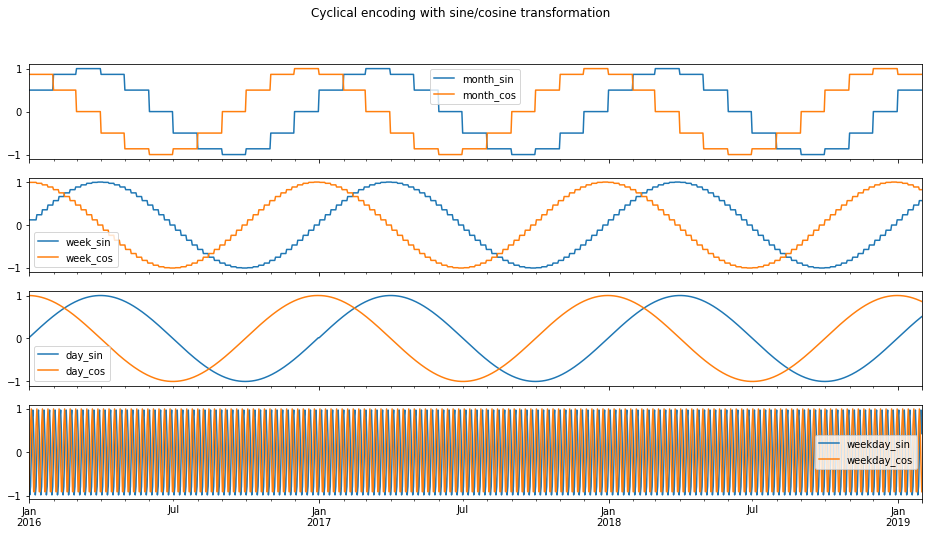

In [86]:
# we create columns with the sine and cosine of the month and day of year
X_2 = X.copy()
X_2['month'] = X_2.index.month
X_2['month_sin'] = sin_transformer(12).fit_transform(X_2)['month']
X_2['month_cos'] = cos_transformer(12).fit_transform(X_2)['month']

X_2['day_sin'] = sin_transformer(365).fit_transform(X_2)['day_of_year']
X_2['day_cos'] = cos_transformer(365).fit_transform(X_2)['day_of_year']

X_2['weekday'] = X_2.index.weekday
X_2['weekday_sin'] = sin_transformer(7).fit_transform(X_2)['weekday']
X_2['weekday_cos'] = cos_transformer(7).fit_transform(X_2)['weekday']

X_2['week'] = X_2.index.week
X_2['week_sin'] = sin_transformer(52).fit_transform(X_2)['week']
X_2['week_cos'] = cos_transformer(52).fit_transform(X_2)['week']

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(16,8))
X_2[['month_sin', 'month_cos']].plot(ax=ax[0])
X_2[['week_sin', 'week_cos']].plot(ax=ax[1])
X_2[['day_sin', 'day_cos']].plot(ax=ax[2])
X_2[['weekday_sin', 'weekday_cos']].plot(ax=ax[3])
plt.suptitle('Cyclical encoding with sine/cosine transformation')
plt.show()

In [87]:
# we merge the new sine and cosine columns into our main df_repsol
X_2.drop(['day_nr', 'month'], axis=1, inplace=True)
# clean fecha column for merge
X_2 = X_2.reset_index()
X_2.rename(columns={'index':'date'}, inplace=True)

# merge based on fecha column
df_repsol =  pd.merge(
   df_repsol, X_2, how='inner', on=['date']
 )

In [88]:
df_repsol.head(4)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday_x,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos
0,2018-08-15,95,43.27540082,-8.52940773,1.329,0.278482531,ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123
1,2018-08-15,GOA,43.27540082,-8.52940773,1.249,0.582275382,ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123
2,2018-08-15,GOA,43.27471331,-8.52874355,1.249,0.52602834,ES8,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27471331, -8.52874355)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123
3,2018-08-15,95,43.27471331,-8.52874355,1.329,0.238859286,ES8,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27471331, -8.52874355)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123


### 3.1.2 Replacing values in columns 'rain' and 'product' and changing datatypes

In [89]:
# assigning value 0.0 when the value for column rain was 'Ip' & replacing product 98 by 95
df_repsol["rain"].replace({"Ip": 0.0}, inplace=True)
df_repsol["product"].replace({'98':'95' }, inplace=True)

In [90]:
# changing the types of the columns 
df_repsol["latitude"] = df_repsol["latitude"].astype(float)
df_repsol["longitude"] = df_repsol["longitude"].astype(float)
df_repsol["price"] = df_repsol["price"].astype(float)
df_repsol["sales_norm"] = df_repsol["sales_norm"].astype(float)
df_repsol["rain"] = df_repsol["rain"].astype(float)
df_repsol["pressure_max"] = df_repsol["pressure_max"].astype(float)
df_repsol["pressure_min"] = df_repsol["pressure_min"].astype(float)
df_repsol["wind_speed_max"] = df_repsol["wind_speed_max"].astype(float)
df_repsol["insolation"] = df_repsol["insolation"].astype(float)
df_repsol["temp_max"] = df_repsol["temp_max"].astype(float)
df_repsol["temp_mean"] = df_repsol["temp_mean"].astype(float)
df_repsol["temp_min"] = df_repsol["temp_min"].astype(float)
df_repsol["wind_speed_mean"] = df_repsol["wind_speed_mean"].astype(float)

### Fixing the sales_norm values greater than 1.0

In [91]:
df_repsol.loc[(df_repsol.sales_norm > 1),'sales_norm']
df_repsol.loc[(df_repsol.sales_norm > 1),'sales_norm']= np.nan
df_repsol.dropna(inplace=True)

In [92]:
df_repsol.dtypes

date                   datetime64[ns]
product                        object
latitude                      float64
longitude                     float64
price                         float64
sales_norm                    float64
station                        object
year                            int64
month                           int64
day                             int64
weekday_x                       int64
holiday                         int64
Christmas                       int64
altitud                         int64
horaracha                      object
horatmax                       object
horatmin                       object
rain                          float64
pressure_max                  float64
pressure_min                  float64
wind_speed_max                float64
insolation                    float64
temp_max                      float64
temp_mean                     float64
temp_min                      float64
wind_speed_mean               float64
coordinates 

## 3.2 Perfom Pandas Profiling

In [93]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df_repsol, title="Pandas Profiling Report", minimal = False)
#report
#profiling = ProfileReport(df_repsol, title="Pandas Profiling Report")

In [94]:
#profiling

## EDA

In [95]:
#checking price outlier 
(df_repsol.loc[:,["price"]]>2).sum()

price    2
dtype: int64

In [96]:
df_repsol = df_repsol[df_repsol["price"]<2]

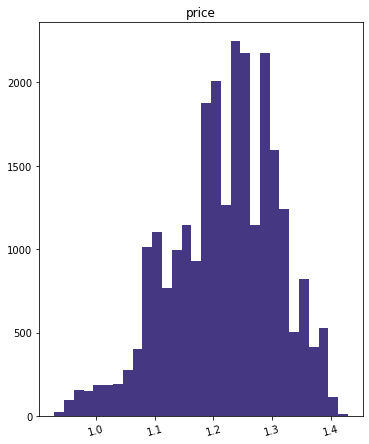

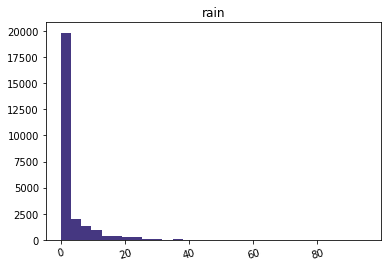

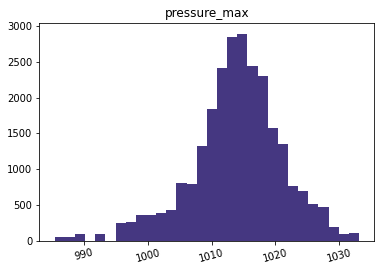

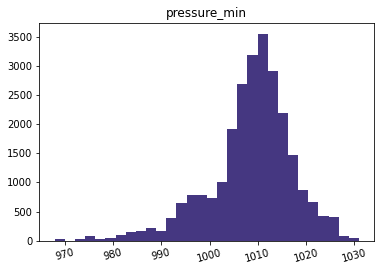

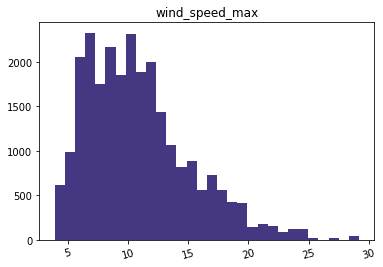

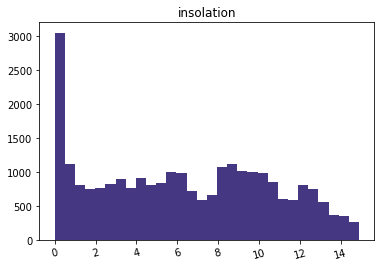

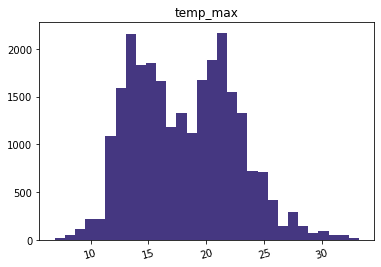

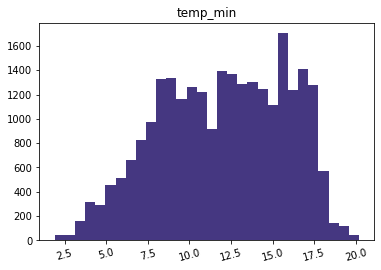

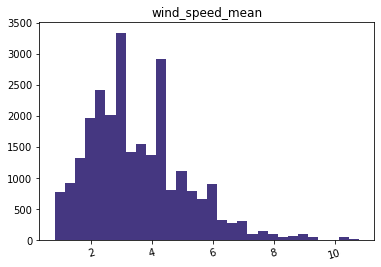

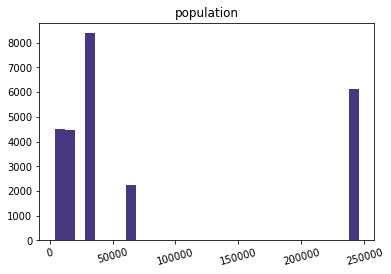

In [97]:
#EDA
initial_features = df_repsol.loc[:,["price", "rain", "pressure_max", "pressure_min", 
                                    "wind_speed_max", "insolation", "temp_max", "temp_min", 
                                    "wind_speed_mean", "population"]].columns
initial_features
fig=plt.figure(figsize=(20,30))
columns = 4
rows = 5
fig.tight_layout()
color = "turquoise"
rng_column = zip(range(1, 12), df_repsol[initial_features])
for ax, column in rng_column:
    fig.add_subplot(rows, columns, ax)
    fig.tight_layout(pad=2)
    if column == "sales_norm":
           plt.hist(df_repsol[initial_features].loc[:, column].dropna(0), bins=30, color="#1F968Bff", alpha=.8)
           plt.title(column)
    else:
        plt.hist(df_repsol[initial_features].loc[:, column].dropna(0), bins=30, color="#453781FF")
        plt.title(column)
        plt.tick_params("x", rotation=15)
        plt.show()

In [98]:
#sns.displot(df_repsol, x="rain", hue="product")

In [99]:
df_repsol.rename(columns = {'weekday_x':'weekday'}, inplace = True)

## *Overview Station & Product*

product          95         GOA
station                        
ES1       82.424089  649.794127
ES10     316.512902  548.990986
ES11     205.759909  667.061917
ES12     251.691651  728.609754
ES2      218.801022  622.473957
ES3      103.242716  460.180220
ES4      158.091674  531.468070
ES5       87.589866  585.393294
ES6      352.982751  691.172108
ES7      229.172777  549.876762
ES8       76.477200  394.318371
ES9      200.150332  701.057352


<AxesSubplot:xlabel='station'>

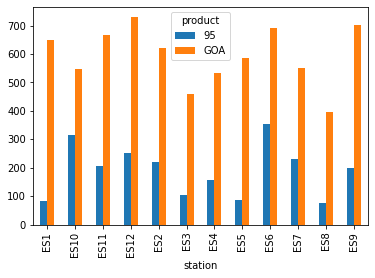

In [100]:
#overview station and product
df = df_repsol.groupby(['station', 'product'])['sales_norm'].sum().unstack(fill_value=0)
print (df)
df.plot.bar()

## Checking for outliers: Price and Rain have some

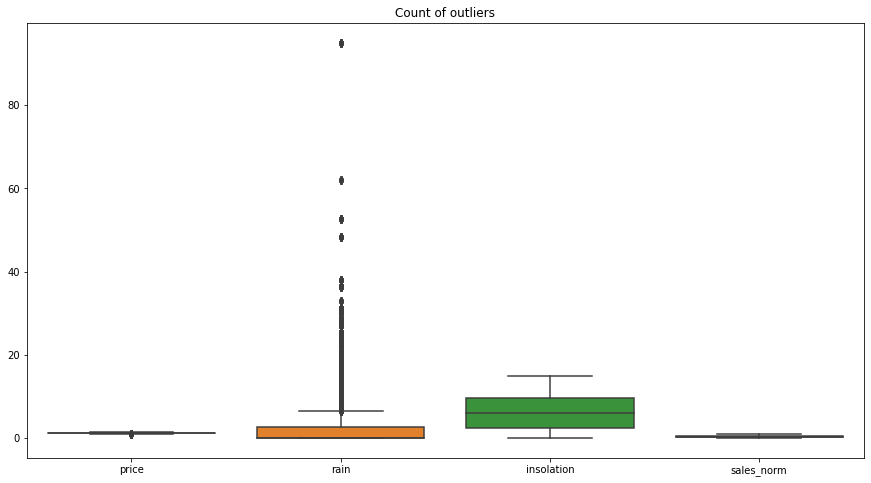

In [101]:
#checking for outliers
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df_repsol[['price', 'rain', 'insolation', 'sales_norm']])
ax.set_title('Count of outliers')
plt.show()

## *Demand plot by weekday seperated by holiday/no holiday*

In [102]:
sales_holidays = df_repsol[["holiday", "sales_norm"]].set_index("holiday").groupby(["holiday"]).mean("sales_norm")
sales_holidays.reset_index(inplace=True)
fig = px.bar(sales_holidays, x="holiday", y="sales_norm",
             title="Average Sales for non holidays vs holidays"
)
fig.show(renderer = 'iframe')

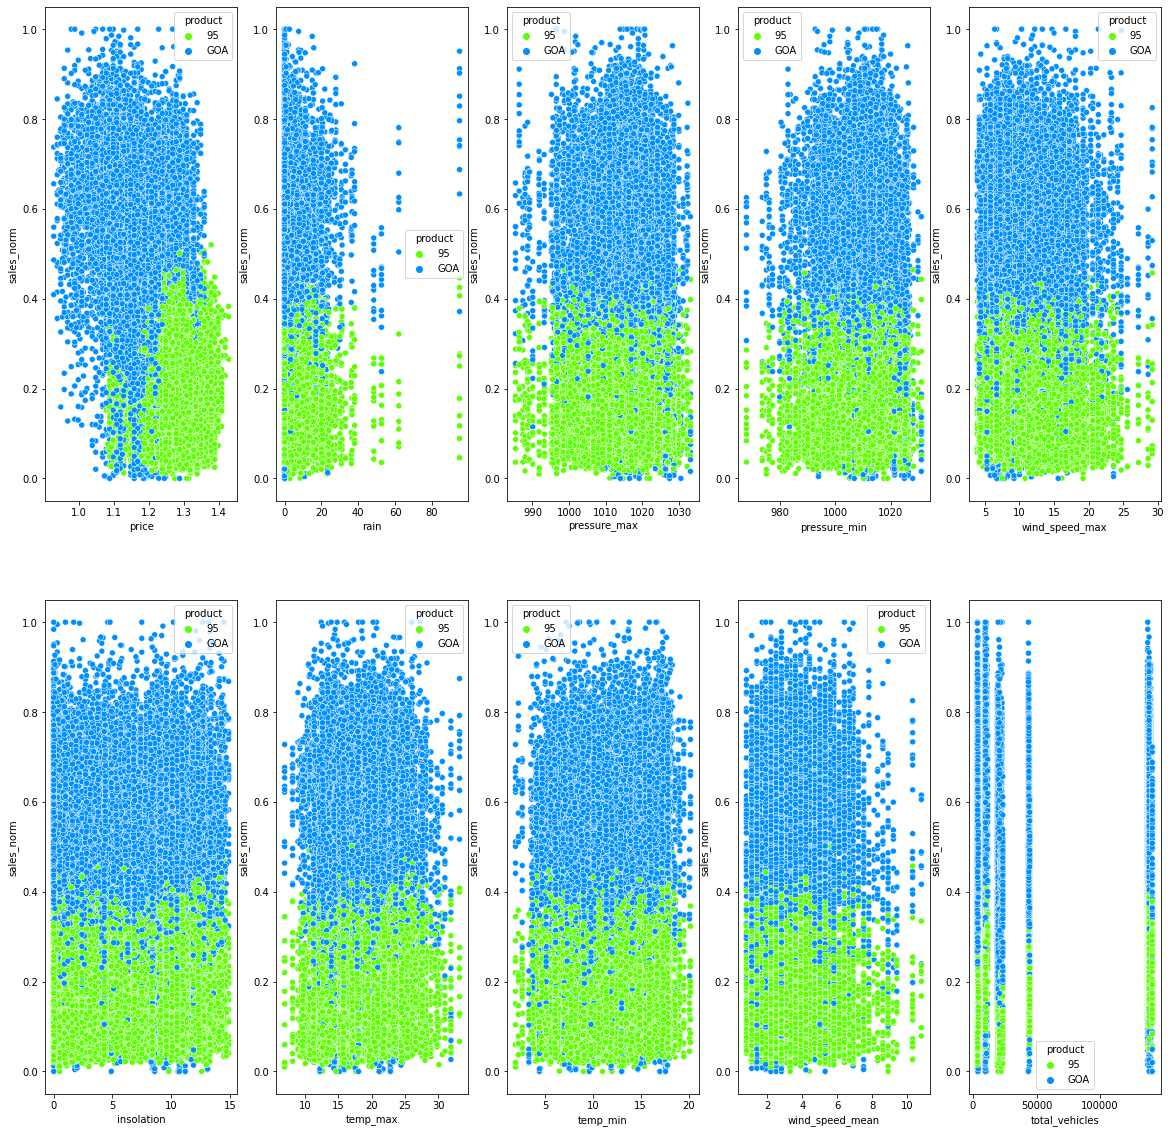

In [103]:
plot_features = ["price", "rain", "pressure_max", "pressure_min", "wind_speed_max", "insolation", "temp_max", "temp_min", "wind_speed_mean", "total_vehicles"]
fig, ax = plt.subplots (2,5, figsize=(20,20))

for column, ax in zip(plot_features, ax.ravel()):
    sns.scatterplot(data=df_repsol, x=column, y= df_repsol.sales_norm, hue ="product", ax=ax, palette = "gist_rainbow")

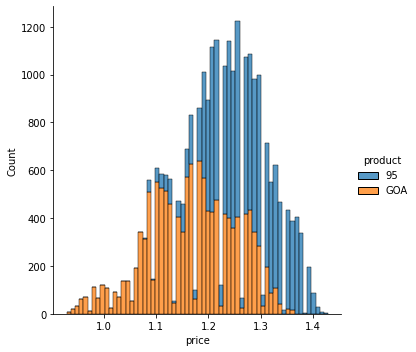

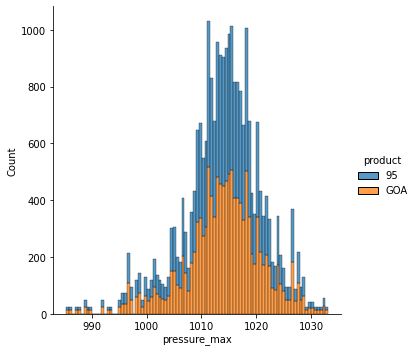

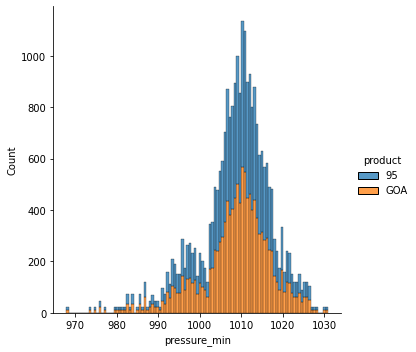

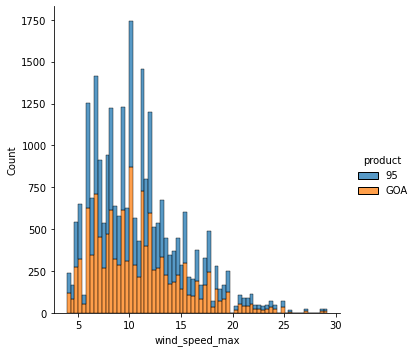

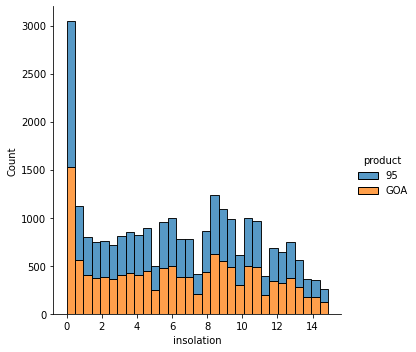

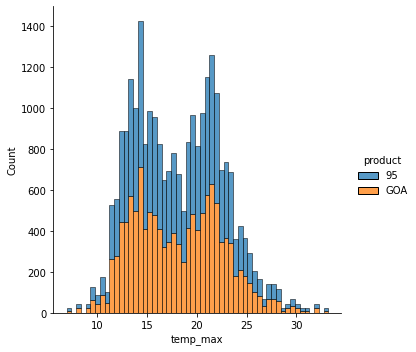

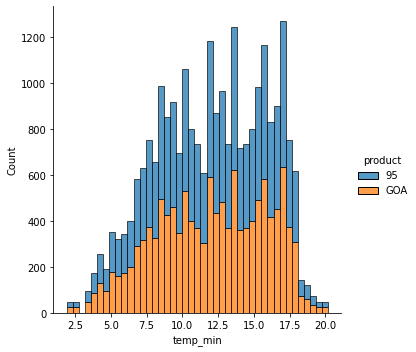

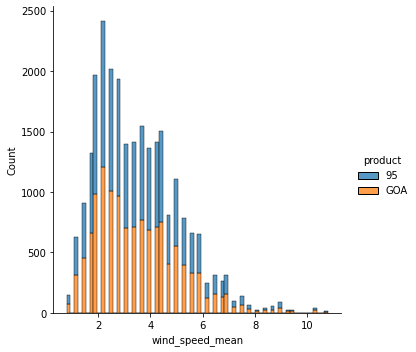

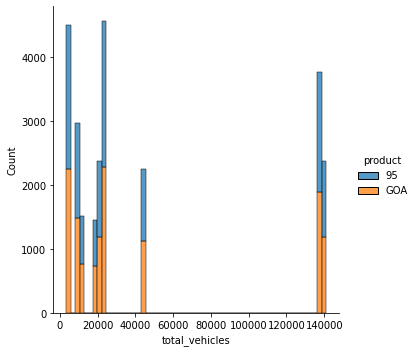

In [104]:
plot_features = ["price", "pressure_max", "pressure_min", "wind_speed_max", "insolation", "temp_max", "temp_min", "wind_speed_mean", "total_vehicles"]
    
for column in plot_features:
    sns.displot(df_repsol, x=column, multiple="stack", hue ="product", ax=ax)
    

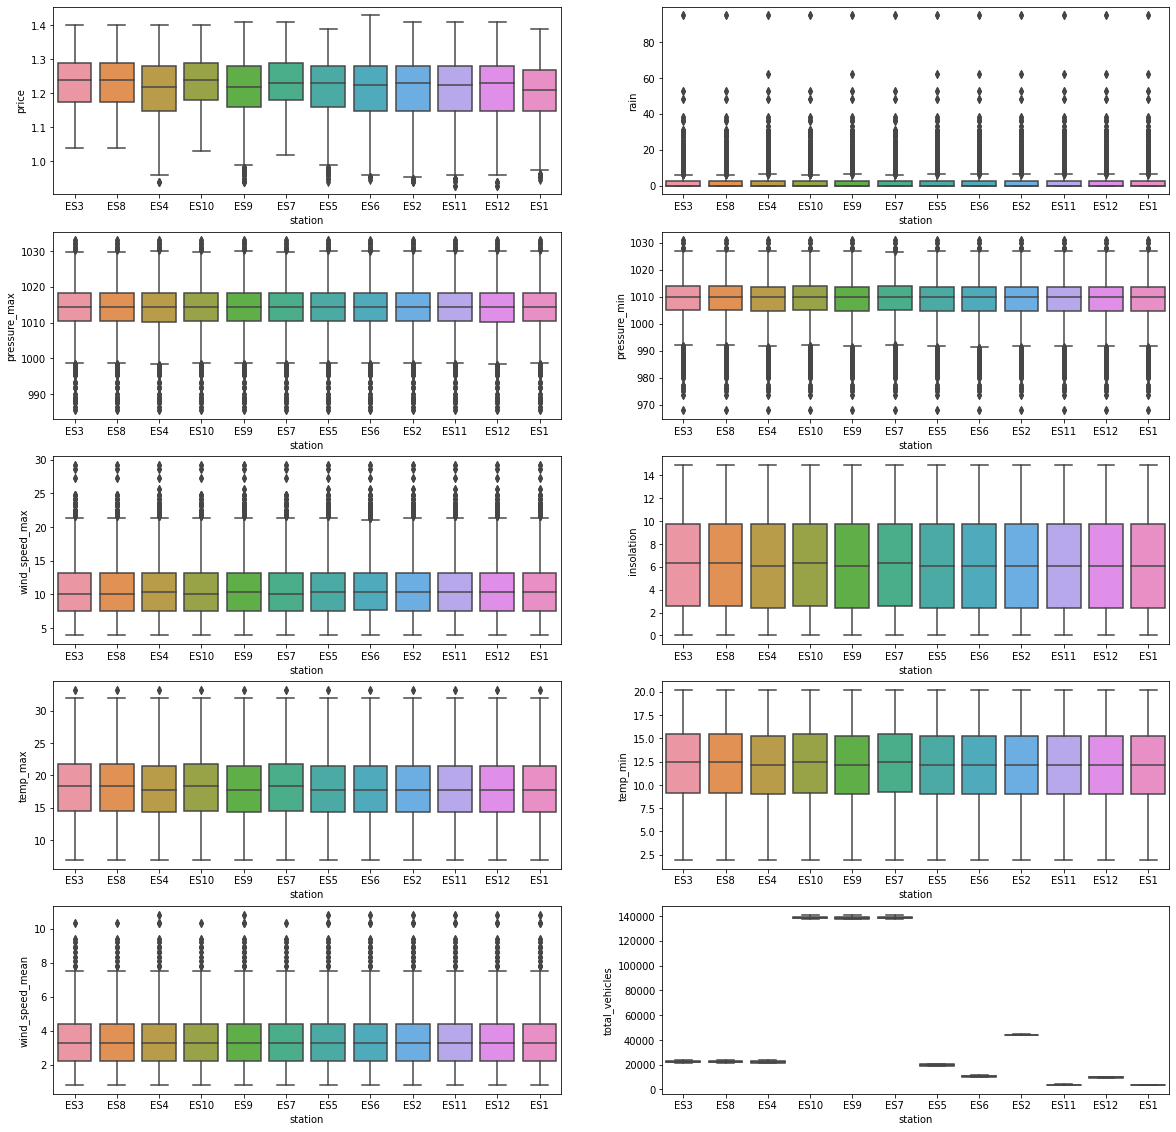

In [105]:
plot_features = ["price", "rain", "pressure_max", "pressure_min", "wind_speed_max", "insolation", "temp_max", "temp_min", "wind_speed_mean", "total_vehicles"]
    
fig, ax = plt.subplots (5, 2, figsize=(20,20))

for column, ax in zip (plot_features, ax.ravel()):
    sns.boxplot(x=df_repsol["station"], y=column, ax=ax, data=df_repsol)

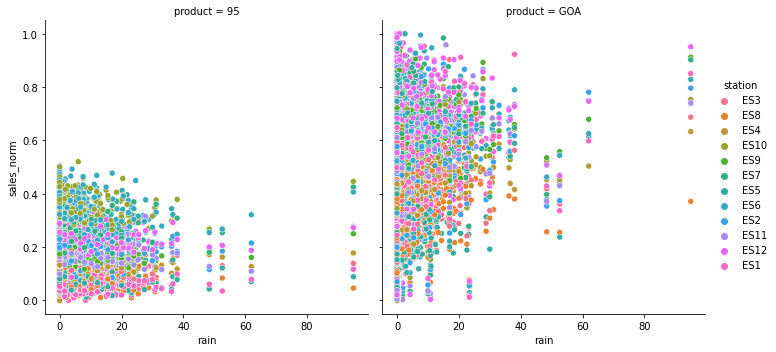

In [106]:
sns.relplot(data=df_repsol, x="rain", y="sales_norm", hue="station", col="product")

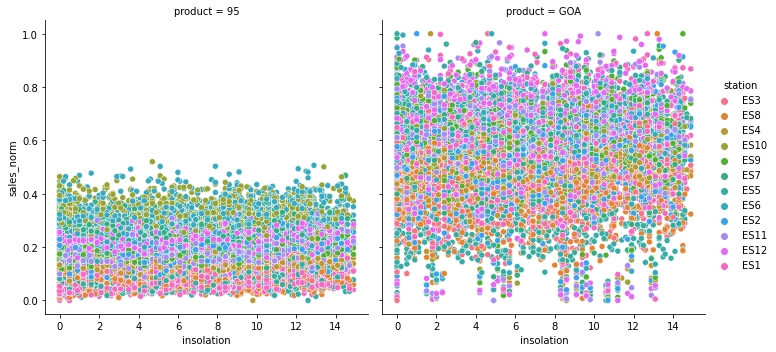

In [107]:
sns.relplot(data=df_repsol, x="insolation", y="sales_norm", hue="station", col="product")

## Title Patrick

In [108]:
df_repsol.head(1)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos
0,2018-08-15,95,43.275401,-8.529408,1.329,0.278483,ES3,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123


In [109]:
sales_month = df_repsol

In [110]:
import datetime as dt
sales_month_95 = sales_month[sales_month["product"] == "95"]
sales_month_95["month"] = sales_month_95["date"].dt.month
sales_month_95 = sales_month_95[["date", "month", "sales_norm"]].set_index("month").groupby("month").sum("sales_norm")

In [111]:
import plotly.express as px

fig = px.line(sales_month_95, x=sales_month_95.index, y="sales_norm")
fig.show(renderer = 'iframe')

In [112]:
sales_month_GOA = sales_month[sales_month["product"] == "GOA"]
sales_month_GOA["month"] = sales_month_GOA["date"].dt.month
sales_month_GOA = sales_month_GOA[["date", "month", "sales_norm"]].set_index("month").groupby("month").sum("sales_norm")

In [113]:
import plotly.express as px

fig = px.line(sales_month_GOA, x=sales_month_GOA.index, y="sales_norm")
fig.show(renderer = 'iframe')

In [114]:
sales_week = df_repsol

In [115]:
sales_week_95 = sales_week[sales_week["product"] == "95"]
sales_week_95["week"] = sales_week_95["date"].dt.week
sales_week_95 = sales_week_95[["date", "week", "sales_norm"]].set_index("week").groupby("week").sum("sales_norm")

In [116]:
import plotly.express as px

fig = px.line(sales_week_95, x=sales_week_95.index, y="sales_norm")

In [117]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [118]:
fig.show(renderer = 'iframe')

In [119]:
sales_week_GOA = sales_week[sales_week["product"] == "GOA"]
sales_week_GOA["week"] = sales_week_GOA["date"].dt.week
sales_week_GOA = sales_week_GOA[["date", "week", "sales_norm"]].set_index("week").groupby("week").sum("sales_norm")

In [120]:
import plotly.express as px

fig = px.line(sales_week_GOA, x=sales_week_GOA.index, y="sales_norm",
             title="Weekly sales for Product GOA"
)
fig.show(renderer = 'iframe')

In [121]:
sales_trend = df_repsol

In [122]:
sales_trend_95= sales_trend[sales_trend["product"] == "95"]
sales_trend_95 = sales_trend_95[["date", "sales_norm"]].set_index("date").groupby("date").sum("sales_norm")

In [123]:
fig = px.line(sales_trend_95, x=sales_trend_95.index, y="sales_norm",
             title="Time Series Total Sales for Product 95"
)
fig.show(renderer = 'iframe')

In [124]:
sales_trend_GOA= sales_trend[sales_trend["product"] == "GOA"]
sales_trend_GOA = sales_trend_GOA[["date", "sales_norm"]].set_index("date").groupby("date").sum("sales_norm")

In [125]:
fig = px.line(sales_trend_GOA, x=sales_trend_GOA.index, y="sales_norm",
              title="Time Series Total Sales for Product GOA"
)
fig.show(renderer = 'iframe')

In [126]:
sales_station = df_repsol

In [127]:
sales_station_95= sales_station[sales_station["product"] == "95"]
sales_station_95 = sales_station_95[["date", "station","sales_norm"]].set_index("date").groupby("station").sum("sales_norm").sort_values(by = "sales_norm", ascending = False,)

In [128]:
fig = px.bar(sales_station_95, x=sales_station_95.index, y='sales_norm',
            title="Total Sales per Station for Product 95"
)
fig.show(renderer = 'iframe')

In [129]:
sales_station_GOA= sales_station[sales_station["product"] == "GOA"]
sales_station_GOA = sales_station_GOA[["date", "station","sales_norm"]].set_index("date").groupby("station").sum("sales_norm").sort_values(by = "sales_norm", ascending = False)

In [130]:
fig = px.bar(sales_station_GOA, x=sales_station_GOA.index, y='sales_norm',
             title="Total Sales per Station for Product GOA"
)
fig.show(renderer = 'iframe')

In [131]:
#can we do sth about the colors? 
sales_together = df_repsol[["station","product", "sales_norm"]].set_index("station").groupby(["station", "product"]).sum("sales_norm")
sales_together.reset_index(inplace=True)
fig = px.bar(sales_together, x="station", y="sales_norm", color="product",
             title="Total Sales per Station for both Products 95 & GOA"
)
fig.show(renderer = 'iframe')

In [132]:
df_repsol.loc[df_repsol['station'] == 'ES8'].head(1)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos
2,2018-08-15,GOA,43.274713,-8.528744,1.249,0.526028,ES8,2018,8,15,2,1,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27471331, -8.52874355)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0,227,-0.866025,-0.5,-0.693281,-0.720667,2,0.974928,-0.222521,33,-0.748511,-0.663123


## NEW FEATURES

New varibles: - Lag 7: for each product and station we use as predictor variables the sales 7 days before - Lag 14 - Lag 21 - Lag 28 - Average of the sales the 7 days before: for each product and station - Cosine and Sine of the month - Cosine and Sine of the weekday

In [133]:
df_repsol.sort_values(by=["station", "product","date"], inplace=True)
df_repsol.head(8)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos
14109,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,4,-0.433884,-0.900969,53,0.120537,0.992709
14126,2016-01-02,95,43.114013,-8.147955,1.164,0.064939,ES1,2016,1,2,5,0,0,58,01:20,14:30,06:20,2.2,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,2,0.5,0.866025,0.034422,0.999407,5,-0.974928,-0.222521,53,0.120537,0.992709
16247,2016-01-03,95,43.114013,-8.147955,1.114,0.069706,ES1,2016,1,3,6,0,0,58,13:20,Varias,00:00,12.0,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,3,0.5,0.866025,0.051620,0.998667,6,-0.781831,0.623490,53,0.120537,0.992709
14808,2016-01-04,95,43.114013,-8.147955,1.204,0.094124,ES1,2016,1,4,0,0,0,58,15:00,00:00,23:40,11.2,999.9,994.5,17.8,0.0,13.0,11.0,9.1,6.7,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,4,0.5,0.866025,0.068802,0.997630,0,0.000000,1.000000,1,0.120537,0.992709
15576,2016-01-05,95,43.114013,-8.147955,1.204,0.097476,ES1,2016,1,5,1,0,1,58,Varias,13:50,11:00,7.6,1006.2,998.6,21.4,1.9,11.2,9.5,7.8,10.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,5,0.5,0.866025,0.085965,0.996298,1,0.781831,0.623490,1,0.120537,0.992709
15815,2016-01-06,95,43.114013,-8.147955,1.214,0.109159,ES1,2016,1,6,2,0,0,58,16:40,Varias,02:50,11.2,1006.5,997.5,19.2,0.0,15.0,12.0,9.0,6.4,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,6,0.5,0.866025,0.103102,0.994671,2,0.974928,-0.222521,1,0.120537,0.992709
11061,2016-01-07,95,43.114013,-8.147955,1.199,0.117059,ES1,2016,1,7,3,0,0,58,02:20,02:40,17:10,95.0,1001.4,995.0,20.3,0.0,15.9,13.9,11.9,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,7,0.5,0.866025,0.120208,0.992749,3,0.433884,-0.900969,1,0.120537,0.992709
9406,2016-01-08,95,43.114013,-8.147955,1.159,0.109441,ES1,2016,1,8,4,0,0,58,01:30,01:20,Varias,7.6,998.7,993.5,18.1,0.3,16.2,13.0,9.7,3.6,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,8,0.5,0.866025,0.137279,0.990532,4,-0.433884,-0.900969,1,0.120537,0.992709


### Lags

In [134]:
df_repsol["lag1_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(1)
df_repsol["lag7_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(7)
df_repsol["lag14_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(14)
df_repsol["lag21_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(21)
df_repsol["lag28_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(28) 

df_repsol["lag1_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(1)
df_repsol["lag7_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(7)
df_repsol["lag14_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(14)
df_repsol["lag21_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(21)
df_repsol["lag28_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(28)

df_repsol["lag1_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(1)
df_repsol["lag7_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(7)
df_repsol["lag14_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(14)
df_repsol["lag21_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(21)
df_repsol["lag28_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(28) 

df_repsol["lag1_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(1)
df_repsol["lag7_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(7)
df_repsol["lag14_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(14)
df_repsol["lag21_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(21)
df_repsol["lag28_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(28) 

df_repsol["lag1_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(1)
df_repsol["lag7_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(7)
df_repsol["lag14_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(14)
df_repsol["lag21_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(21)
df_repsol["lag28_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(28)  

df_repsol["lag1_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(1)
df_repsol["lag7_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(7)
df_repsol["lag14_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(14)
df_repsol["lag21_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(21)
df_repsol["lag28_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(28) 

### Rolling Means

In [135]:
df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(5).mean().values

array([       nan,        nan,        nan, ..., 0.54644198, 0.52862473,
       0.54868881])

In [136]:
df_repsol["sales_norm_roll_7"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(7).mean().values
df_repsol["sales_norm_roll_14"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(14).mean().values
df_repsol["sales_norm_roll_21"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(21).mean().values
df_repsol["sales_norm_roll_28"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(28).mean().values 

df_repsol["price_roll_7"] = df_repsol.groupby(['station', 'product'])['price'].rolling(7).mean().values
df_repsol["price_roll_14"] = df_repsol.groupby(['station', 'product'])['price'].rolling(14).mean().values
df_repsol["price_roll_21"] = df_repsol.groupby(['station', 'product'])['price'].rolling(21).mean().values
df_repsol["price_roll_28"] = df_repsol.groupby(['station', 'product'])['price'].rolling(28).mean().values

In [137]:
df_repsol[df_repsol["station"]=='ES1'].head(1)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos,lag1_sales,lag7_sales,lag14_sales,lag21_sales,lag28_sales,lag1_price,lag7_price,lag14_price,lag21_price,lag28_price,lag1_rain,lag7_rain,lag14_rain,lag21_rain,lag28_rain,lag1_temp_mean,lag7_temp_mean,lag14_temp_mean,lag21_temp_mean,lag28_temp_mean,lag1_wind_speed_mean,lag7_wind_speed_mean,lag14_wind_speed_mean,lag21_wind_speed_mean,lag28_wind_speed_mean,lag1_insolation,lag7_insolation,lag14_insolation,lag21_insolation,lag28_insolation,sales_norm_roll_7,sales_norm_roll_14,sales_norm_roll_21,sales_norm_roll_28,price_roll_7,price_roll_14,price_roll_21,price_roll_28
14109,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,4,-0.433884,-0.900969,53,0.120537,0.992709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_repsol

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,Christmas,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_y,weekday_sin,weekday_cos,week,week_sin,week_cos,lag1_sales,lag7_sales,lag14_sales,lag21_sales,lag28_sales,lag1_price,lag7_price,lag14_price,lag21_price,lag28_price,lag1_rain,lag7_rain,lag14_rain,lag21_rain,lag28_rain,lag1_temp_mean,lag7_temp_mean,lag14_temp_mean,lag21_temp_mean,lag28_temp_mean,lag1_wind_speed_mean,lag7_wind_speed_mean,lag14_wind_speed_mean,lag21_wind_speed_mean,lag28_wind_speed_mean,lag1_insolation,lag7_insolation,lag14_insolation,lag21_insolation,lag28_insolation,sales_norm_roll_7,sales_norm_roll_14,sales_norm_roll_21,sales_norm_roll_28,price_roll_7,price_roll_14,price_roll_21,price_roll_28
14109,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,4,-0.433884,-0.900969,53,0.120537,0.992709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14126,2016-01-02,95,43.114013,-8.147955,1.164,0.064939,ES1,2016,1,2,5,0,0,58,01:20,14:30,06:20,2.2,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,2,0.5,0.866025,0.034422,0.999407,5,-0.974928,-0.222521,53,0.120537,0.992709,0.024927,NaN,NaN,NaN,NaN,1.154,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,12.4,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16247,2016-01-03,95,43.114013,-8.147955,1.114,0.069706,ES1,2016,1,3,6,0,0,58,13:20,Varias,00:00,12.0,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,3,0.5,0.866025,0.051620,0.998667,6,-0.781831,0.623490,53,0.120537,0.992709,0.064939,NaN,NaN,NaN,NaN,1.164,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14808,2016-01-04,95,43.114013,-8.147955,1.204,0.094124,ES1,2016,1,4,0,0,0,58,15:00,00:00,23:40,11.2,999.9,994.5,17.8,0.0,13.0,11.0,9.1,6.7,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,4,0.5,0.866025,0.068802,0.997630,0,0.000000,1.000000,1,0.120537,0.992709,0.069706,NaN,NaN,NaN,NaN,1.114,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15576,2016-01-05,95,43.114013,-8.147955,1.204,0.097476,ES1,2016,1,5,1,0,1,58,Varias,13:50,11:00,7.6,1006.2,998.6,21.4,1.9,11.2,9.5,7.8,10.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,5,0.5,0.866025,0.085965,0.996298,1,0.781831,0.623490,1,0.120537,0.992709,0.094124,NaN,NaN,NaN,NaN,1.204,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25649,2019-01-27,GOA,43.333647,-8.402475,1.209,0.360448,ES9,2019,1,27,6,0,0,58,02:10,12:40,03:00,3.2,1016.9,1011.9,16.7,4.3,12.7,11.2,9.8,5.0,"(43.33364736, -8.40247476)",26168,"Coruña, A"

### Workday Variable

In [139]:
df_repsol["workday"] = df_repsol["weekday"].map(lambda x: 1 if x<5 else 0)

### Season

In [140]:
spring = range(3, 6) 
summer = range(6, 9) 
autumn = range(9, 12)
winter = [1, 2, 12]

def season(dataset):
    if dataset["month"] in spring:
        return 2
    elif dataset["month"] in summer:
        return 1
    elif dataset["month"] in autumn:
        return 3
    elif dataset["month"] in winter:
        return 4

# apply season to dataframe
df_repsol["season"] = df_repsol.apply(season, axis=1)

## CORRELATION MATRICES

Correlation table between the regressors. Do we have multicollinearity between the external variables?

Correlation table between the regressors and the target (For each product)?

In [141]:
df_repsol_95 = df_repsol[df_repsol["product"] == "95"]
df_repsol_numerical_variables_95 = df_repsol_95.loc[:, ~df_repsol.columns.isin(['date', 'product', "latitude", "longitude","altitud", "station","horaracha", "horatmax", "horatmin", "coordinates", "municipality", "provinces"])]

<AxesSubplot:>

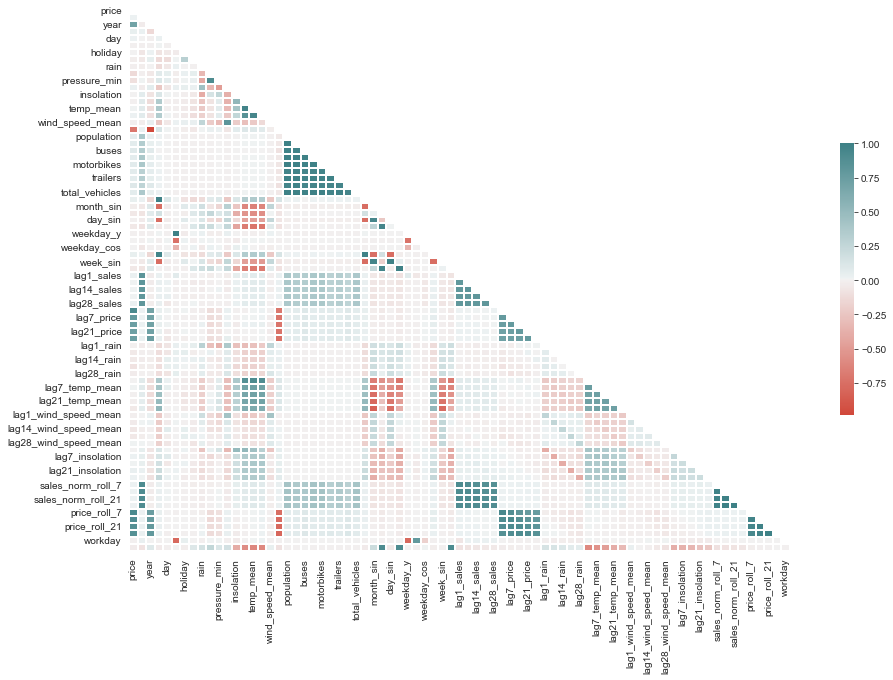

In [142]:
corr = df_repsol_numerical_variables_95.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(15, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

In [143]:
df_repsol_GOA = df_repsol[df_repsol["product"] == "GOA"]
df_repsol_numerical_variables_GOA = df_repsol_GOA.loc[:, ~df_repsol.columns.isin(['date', 'product', "latitude", "longitude","altitud", "station","horaracha", "horatmax", "horatmin", "coordinates", "municipality", "provinces"])]

<AxesSubplot:>

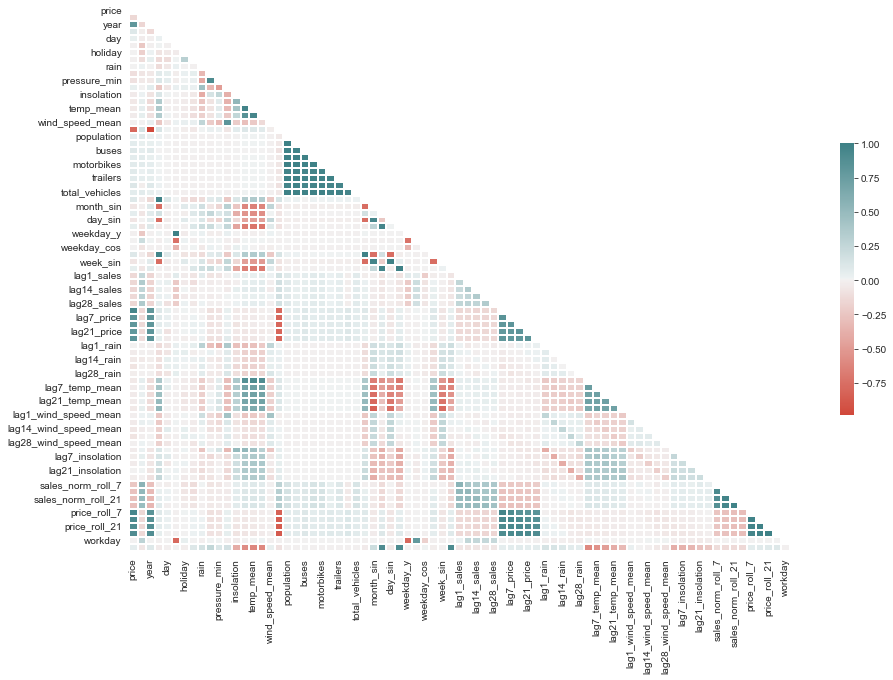

In [144]:
corr = df_repsol_numerical_variables_GOA.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(15, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

## 4. Splitting into the dataset for each model

In [145]:
for stat in df_repsol['station'].value_counts().index:
    for prod in df_repsol['product'].value_counts().index:
        new  = pd.DataFrame((df_repsol.loc[(df_repsol['station'] == stat ) & (df_repsol['product'] == prod)]))
        new.to_csv(f"df_{stat}_{prod}.csv", index=False)    

## 5. Final dataset for the models

In [146]:
df_repsol.to_csv("df_repsol.csv")